In [33]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

In [34]:
df = pd.read_csv("../data/Dataset_spine.csv")
df.head()

,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,Col11,Col12,Class_att,Unnamed: 13
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,0.744503,12.5661,14.5386,15.30468,-28.658501,43.5123,Abnormal,NaN
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0.415186,12.8874,17.5323,16.78486,-25.530607,16.1102,Abnormal,NaN
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0.474889,26.8343,17.4861,16.65897,-29.031888,19.2221,Abnormal,NaN
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0.369345,23.5603,12.7074,11.42447,-30.470246,18.8329,Abnormal,NaN
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0.543360,35.4940,15.9546,8.87237,-16.378376,24.9171,Abnormal,NaN


<Axes: xlabel='Class_att', ylabel='count'>

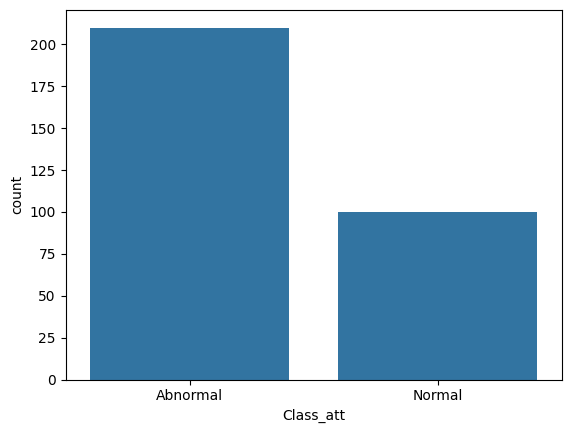

In [35]:
sns.countplot(x="Class_att", data=df)

In [36]:
# Encode output class
# df["Class_att"] = df["Class_att"].astype("category")

encode_map = {
    "Abnormal": 1,
    "Normal": 0
}

df["Class_att"].replace(encode_map, inplace=True)


C:\Users\Upesh\AppData\Local\Temp\ipykernel_11200\346891693.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Class_att"].replace(encode_map, inplace=True)
C:\Users\Upesh\AppData\Local\Temp\ipykernel_11200\346891693.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Class_att"].replace(en

In [37]:
df["Class_att"]

0      1
1      1
2      1
3      1
4      1
      ..
305    0
306    0
307    0
308    0
309    0
Name: Class_att, Length: 310, dtype: int64

In [38]:
X = df.iloc[:, 0:12]
y = df.iloc[:, 12]

print(f"{X.head()=}")
print(f"{y.head()=}")

X.head()=        Col1       Col2       Col3       Col4        Col5       Col6  \
0  63.027817  22.552586  39.609117  40.475232   98.672917  -0.254400   
1  39.056951  10.060991  25.015378  28.995960  114.405425   4.564259   
2  68.832021  22.218482  50.092194  46.613539  105.985135  -3.530317   
3  69.297008  24.652878  44.311238  44.644130  101.868495  11.211523   
4  49.712859   9.652075  28.317406  40.060784  108.168725   7.918501   

       Col7     Col8     Col9     Col10      Col11    Col12  
0  0.744503  12.5661  14.5386  15.30468 -28.658501  43.5123  
1  0.415186  12.8874  17.5323  16.78486 -25.530607  16.1102  
2  0.474889  26.8343  17.4861  16.65897 -29.031888  19.2221  
3  0.369345  23.5603  12.7074  11.42447 -30.470246  18.8329  
4  0.543360  35.4940  15.9546   8.87237 -16.378376  24.9171  
y.head()=0    1
1    1
2    1
3    1
4    1
Name: Class_att, dtype: int64


In [39]:
RANDOM_SEED = 42
# Split into train and test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=RANDOM_SEED)

print(f"{X_train.shape=}")
print(f"{X_test.shape=}")
print(f"{y_train.shape=}")
print(f"{y_test.shape=}")

X_train.shape=(207, 12)
X_test.shape=(103, 12)
y_train.shape=(207,)
y_test.shape=(103,)


In [40]:
# Standardize input
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [41]:
X_train

array([[-1.37202001,  0.25923767, -1.71333214, ..., -0.80599815,
        -0.07495636,  1.20007508],
       [ 0.24994168,  0.35515544,  0.2076004 , ..., -0.17433336,
         1.31921218, -0.81532979],
       [-0.68278003, -0.3841279 , -0.8065591 , ...,  0.13307376,
        -1.01230518, -1.12221813],
       ...,
       [ 0.31790653, -0.74297648,  0.38824039, ..., -0.3662492 ,
         1.63203394,  0.85631296],
       [-0.47210125, -0.84342974,  0.34648583, ..., -0.60404398,
         1.56500092,  1.01529103],
       [ 0.62841697, -0.36403129,  0.58481187, ...,  0.14065634,
         1.59316912,  0.84577355]])

In [42]:
# Hyper parameters
EPOCHS = 10
BATCH_SIZE = 64
LEARNING_RATE = 0.01

In [43]:
class TrainData(Dataset):
    
    def __init__(self, X_train, y_train):
        
        self.X_data = X_train
        self.y_data = y_train
        
    def __len__(self):
        return len(self.X_data)
    
    def __getitem__(self, index):
        return self.X_data[index], self.y_data[index]
    
train_dataset = TrainData(X_train=torch.FloatTensor(X_train), y_train=torch.FloatTensor(y_train))
train_dataset

In [44]:
class TestData(Dataset):
    
    def __init__(self, X_test) -> None:
        
        self.X_data = X_test
        
    def __len__(self):
        return len(self.X_data)
        
    def __getitem__(self, index):
        return self.X_data[index]
    
test_dataset = TestData(X_test=torch.FloatTensor(X_test))
test_dataset


In [45]:
train_loader = DataLoader(dataset=train_dataset, batch_size=BATCH_SIZE, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=1, shuffle=False)

print(f"{train_loader=}")
print(f"{test_loader=}")

train_loader=<torch.utils.data.dataloader.DataLoader object at 0x000001B3422405D0>
test_loader=<torch.utils.data.dataloader.DataLoader object at 0x000001B347162010>


In [46]:
# Test the data loader
batch = next(iter(train_loader))
print(batch)

[tensor([[ 3.5547e-01, -6.6968e-01,  3.1750e-01,  9.2401e-01, -7.4822e-01,
          6.9510e-01, -1.0185e+00, -9.8137e-02, -4.3441e-01,  1.5069e+00,
         -8.2684e-01, -9.4811e-01],
        [-6.7426e-01, -6.5424e-01,  1.7625e-01, -3.9831e-01,  5.4191e-01,
         -6.5459e-01,  9.8217e-01,  1.3737e+00, -2.8106e-01,  1.2538e+00,
          7.7243e-01,  1.2826e+00],
        [ 1.4087e+00,  2.5384e+00,  6.3021e-01,  7.7486e-03, -2.8319e-01,
          1.5867e-02,  5.0265e-01, -1.4256e+00, -1.6935e+00, -7.1854e-01,
         -5.1115e-01, -3.4192e-01],
        [-6.1681e-01,  1.1050e-01,  6.2764e-02, -8.6333e-01,  1.6358e+00,
         -3.8518e-01, -1.2992e+00,  5.9305e-01,  1.8380e+00, -1.2173e+00,
         -7.1660e-01,  1.2816e+00],
        [-6.5955e-01, -1.1761e+00,  3.4973e-01, -1.2306e-02, -1.8389e+00,
          1.7106e-01, -2.4308e-01,  1.1809e+00, -4.1841e-01, -1.9538e-01,
         -9.5997e-01,  1.3958e+00],
        [-5.0872e-01, -1.0953e+00, -9.0189e-01,  1.2292e-01, -1.5793e-01,
     

In [47]:
class BackPainNN(nn.Module):
    
    def __init__(self, input_size: int, hidden_size: int, output_size: int):
        
        super().__init__()
        
        self.layer_1 = nn.Linear(input_size, hidden_size)
        self.layer_2 = nn.Linear(hidden_size, hidden_size)
        self.layer_out = nn.Linear(hidden_size, output_size)
        
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(p=0.1)
        self.batchnorm_1 = nn.BatchNorm1d(64)
        self.batchnorm_2 = nn.BatchNorm1d(64)
        
    def forward(self, x):
        
        x = self.relu(self.layer_1(x))
        x = self.batchnorm_1(x)
        x = self.relu(self.layer_2(x))
        x = self.batchnorm_2(x)
        x = self.dropout(x)
        x = self.layer_out(x)
        
        return x
    


In [48]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

device(type='cpu')

In [49]:
model = BackPainNN(12, 64, 1).to(device=device)
model

BackPainNN(
  (layer_1): Linear(in_features=12, out_features=64, bias=True)
  (layer_2): Linear(in_features=64, out_features=64, bias=True)
  (layer_out): Linear(in_features=64, out_features=1, bias=True)
  (relu): ReLU()
  (dropout): Dropout(p=0.1, inplace=False)
  (batchnorm_1): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (batchnorm_2): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
)

In [50]:
loss_fn = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)

In [51]:
def binary_accuract(pred, truth):
    
    y_pred_tag = torch.round(torch.sigmoid(pred))
    
    correct = torch.eq(y_pred_tag, truth).sum().item()
    return correct / len(truth)

In [52]:

model.train()

for epoch in range(EPOCHS):
    
    epoch_loss, epoch_accuracy = 0, 0
    for X, y in train_loader:
        
        X, y = X.to(device), y.to(device)
        y_logits = model(X)
        
        # print(y_logits.shape)
        # print(y.shape)
        
        loss = loss_fn(y_logits.squeeze(), y)
        acc = binary_accuract(y_logits.squeeze(), y)
        
        epoch_loss += loss.item()
        epoch_accuracy += acc
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
    epoch_loss /= len(train_loader)
    epoch_accuracy /= len(train_loader)
    
    print(f"Epoch: {epoch} | Loss: {epoch_loss:.5f} | Accuracy: {epoch_accuracy:.2f}")
        
        
        

Epoch: 0 | Loss: 0.53308 | Accuracy: 0.73
Epoch: 1 | Loss: 0.44119 | Accuracy: 0.77
Epoch: 2 | Loss: 0.28077 | Accuracy: 0.88
Epoch: 3 | Loss: 0.27737 | Accuracy: 0.88
Epoch: 4 | Loss: 0.19717 | Accuracy: 0.91


Epoch: 5 | Loss: 0.21611 | Accuracy: 0.90
Epoch: 6 | Loss: 0.18345 | Accuracy: 0.93
Epoch: 7 | Loss: 0.19590 | Accuracy: 0.94
Epoch: 8 | Loss: 0.13480 | Accuracy: 0.93
Epoch: 9 | Loss: 0.10743 | Accuracy: 0.94


In [53]:
model.eval()
y_pred_list = []
with torch.inference_mode():
    for test_batch in test_loader:
        
        test_batch = test_batch.to(device)
        logits = model(test_batch)
        
        y_test_pred = torch.round(torch.sigmoid(logits))
        y_pred_list.append(y_test_pred.squeeze().cpu().numpy())

y_pred_list


[array(0., dtype=float32),
 array(1., dtype=float32),
 array(0., dtype=float32),
 array(1., dtype=float32),
 array(1., dtype=float32),
 array(1., dtype=float32),
 array(1., dtype=float32),
 array(1., dtype=float32),
 array(1., dtype=float32),
 array(1., dtype=float32),
 array(1., dtype=float32),
 array(1., dtype=float32),
 array(0., dtype=float32),
 array(1., dtype=float32),
 array(0., dtype=float32),
 array(1., dtype=float32),
 array(0., dtype=float32),
 array(1., dtype=float32),
 array(0., dtype=float32),
 array(1., dtype=float32),
 array(1., dtype=float32),
 array(1., dtype=float32),
 array(1., dtype=float32),
 array(1., dtype=float32),
 array(1., dtype=float32),
 array(1., dtype=float32),
 array(1., dtype=float32),
 array(0., dtype=float32),
 array(0., dtype=float32),
 array(0., dtype=float32),
 array(1., dtype=float32),
 array(1., dtype=float32),
 array(1., dtype=float32),
 array(0., dtype=float32),
 array(1., dtype=float32),
 array(1., dtype=float32),
 array(1., dtype=float32),
 

In [54]:
confusion_matrix(y_test, y_pred_list)

array([[19, 10],
       [10, 64]], dtype=int64)

In [55]:
print(classification_report(y_test, y_pred_list))

              precision    recall  f1-score   support

           0       0.66      0.66      0.66        29
           1       0.86      0.86      0.86        74

    accuracy                           0.81       103
   macro avg       0.76      0.76      0.76       103
weighted avg       0.81      0.81      0.81       103



In [56]:
MODEL_NAME = "BackPain.pth"

torch.save(model.state_dict(), MODEL_NAME)

In [68]:
weights = torch.load(MODEL_NAME)

X = next(iter(test_loader))

print(X)

loaded_model = BackPainNN(12, 64, 1)
loaded_model.load_state_dict(weights)

loaded_model.eval()
with torch.inference_mode():
    
    preds = loaded_model(X)
    
    print(preds)

tensor([[-0.8688, -0.2905, -1.0583, -0.9021,  1.0449, -0.7341, -1.2222, -0.6909,
         -1.4731,  0.1005, -1.0095,  0.6006]])
tensor([[-0.4327]])


In [69]:
import joblib

In [70]:
# Save the scaler so that it can be loaded later for inference

joblib.dump(scaler, "Backpain_Scaler.bin")

['Backpain_Scaler.bin']